In [27]:
# loop through the RefAtlasRegions folder to read in all the CSV files
import pandas as pd
import os   
import numpy as np


# Define the path to the RefAtlasRegions folder
ref_atlas_regions_path = "RefAtlasRegions"
region_IDs_todefine = []
regions_zero = []

# Loop through all files in the RefAtlasRegions folder
for filename in os.listdir(ref_atlas_regions_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(ref_atlas_regions_path, filename)
        # Read the CSV file into a DataFrame
        # print(f"Reading file: {file_path}")
        df = pd.read_csv(file_path, sep=";")
        df_no_zero = df[df["Object count"] > 0]
        df_only_zero = df[df["Object count"] == 0]
        
        # go through df_no_zero and get the region IDs
        for region_id_no in df_no_zero["Region ID"]:
            
            
                
            if region_id_no not in region_IDs_todefine:
                region_IDs_todefine.append(region_id_no)
        for region_id in df_only_zero["Region ID"]:
            if region_id not in regions_zero:
                regions_zero.append(region_id)
            

# print(f"Region IDs to define: {region_IDs_todefine}")
print(f"Regions with zero objects: {regions_zero}")



        


Regions with zero objects: [8, 567, 688, 695, 315, 184, 68, 667, 526157192, 526157196, 526322264, 500, 107, 219, 299, 644, 947, 985, 320, 882, 993, 1085, 453, 12993, 12994, 12995, 12996, 12997, 12998, 322, 793, 346, 865, 921, 686, 719, 353, 558, 838, 654, 702, 889, 929, 329, 1047, 1070, 1038, 1062, 480149202, 480149206, 480149210, 480149214, 480149218, 480149222, 480149226, 337, 1030, 113, 1094, 1128, 345, 878, 657, 950, 974, 1102, 2, 369, 450, 854, 577, 625, 361, 1006, 670, 1086, 1111, 9, 461, 182305689, 182305693, 182305697, 182305701, 182305705, 182305709, 182305713, 378, 806, 1035, 1090, 862, 893, 1057, 662, 677, 897, 849, 247, 1011, 527, 600, 678, 252, 156, 243, 480149230, 480149234, 480149238, 480149242, 480149246, 480149250, 480149254, 1002, 735, 251, 816, 954, 1005, 1027, 696, 643, 759, 791, 249, 456, 1018, 959, 755, 990, 598, 669, 801, 561, 913, 937, 457, 497, 402, 1074, 1114, 601, 649, 394, 281, 1066, 401, 1046, 441, 409, 421, 973, 385, 305, 425, 750, 269, 869, 902, 533, 805,

In [31]:
# compare region_IDs_todefine and regions_zero and take out all the region IDs from regions_zero that are in region_IDs_todefine
for region_id in regions_zero:
    if region_id in region_IDs_todefine:
        regions_zero.remove(region_id)
        # print(region_id, "is in region_IDs_todefine, removing it from regions_zero")


print(regions_zero)

[8, 567, 688, 695, 315, 184, 500, 107, 219, 299, 644, 947, 985, 993, 453, 12993, 12994, 12995, 12996, 12997, 12998, 322, 793, 346, 865, 921, 686, 719, 353, 329, 480149202, 480149206, 480149210, 480149214, 480149218, 480149222, 480149226, 337, 345, 369, 361, 461, 182305689, 378, 1057, 677, 247, 1011, 480149230, 480149234, 480149238, 480149242, 480149246, 480149250, 480149254, 1002, 1027, 1018, 669, 801, 561, 913, 937, 457, 497, 402, 394, 409, 385, 425, 533, 312782574, 312782628, 31, 572, 1053, 739, 179, 227, 39, 48, 972, 195, 132, 44, 747, 1081, 714, 264, 492, 352, 476, 516, 723, 731, 524, 738, 746, 95, 104, 111, 119, 699, 254, 894, 480149258, 480149262, 480149266, 480149270, 480149274, 480149278, 480149282, 480149286, 480149290, 480149294, 480149298, 480149302, 480149306, 480149310, 480149314, 480149318, 480149322, 480149326, 480149330, 480149334, 480149338, 879, 545, 886, 606, 22, 532, 241, 635, 683, 308, 340, 312782546, 417, 541, 922, 895, 212, 220, 228, 236, 244, 151, 167, 175, 183,

In [35]:
region_without_neurons = pd.DataFrame(columns=["Region ID", "Region name"])

# add region_IDs_todefine to the DataFrame
region_without_neurons["Region ID"] = regions_zero


example_df = pd.read_csv("20241010_p1_7_n3_RefAtlasRegions_black.csv", sep=";")

for region_id in regions_zero:
    # search in example_df for the region_id region name
    region_name = example_df.loc[example_df["Region ID"] == region_id, "Region name"].values
    # add region name to region_without_neurons
    
    region_without_neurons.loc[region_without_neurons["Region ID"] == region_id, "Region name"] = region_name[0]

     
   



    
region_without_neurons.to_csv("region_without_neurons.csv", index=False, sep=";")
    






In [21]:
# transform region_IDs_todefine to a DataFrame with a column "Region ID" and another column "Region name"  with the corersponding name to the region Id
region_with_neurons = pd.DataFrame(columns=["Region ID", "Region name"])
print(region_with_neurons)
# add region_IDs_todefine to the DataFrame
region_with_neurons["Region ID"] = region_IDs_todefine

example_df = pd.read_csv("20241010_p1_7_n3_RefAtlasRegions_black.csv", sep=";")
# get the right region names according to the region IDs in region_IDs_todefine and put it in region_with_neurons["Region name"]
for region_id in region_IDs_todefine:
    # search in example_df for the region_id region name
    region_name = example_df.loc[example_df["Region ID"] == region_id, "Region name"].values
    # add region name to region_with_neurons
    if len(region_name) > 0:
        region_with_neurons.loc[region_with_neurons["Region ID"] == region_id, "Region name"] = region_name[0]

        
   

print(region_with_neurons)
# export as csv file only if it doens't already exist
if not os.path.exists("region_with_neurons.csv"):
    print("Exporting region_with_neurons.csv")
    region_with_neurons.to_csv("region_with_neurons.csv", index=False, sep=";")
    
else:
    print("region_with_neurons.csv already exists, not exporting.")





Empty DataFrame
Columns: [Region ID, Region name]
Index: []
     Region ID                                  Region name
0            0                                  Clear Label
1          997                                         root
2          943                Primary motor area, Layer 2/3
3          648                  Primary motor area, Layer 5
4          844                 Primary motor area, Layer 6a
..         ...                                          ...
579        445  Spinal nucleus of the trigeminal, oral part
580       1109                           Parastrial nucleus
581        217                  Superior vestibular nucleus
582        911                              trochlear nerve
583        231                   Anterior tegmental nucleus

[584 rows x 2 columns]
Exporting region_with_neurons.csv


In [38]:
# transform region_IDs_todefine to a DataFrame with a column "Region ID" and another column "Region name"  with the corersponding name to the region Id
regions = pd.DataFrame(columns=["Region ID", "Region name", "General area", "Specific Interest"])


example_df = pd.read_csv("20241010_p1_7_n3_RefAtlasRegions_black.csv", sep=";")
regions["Region ID"] = example_df["Region ID"].unique()
for region_id in example_df["Region ID"]:
    # add region ID and Region name to regions
    region_name = example_df.loc[example_df["Region ID"] == region_id, "Region name"].values
    regions.loc[regions["Region ID"] == region_id, "Region name"] = region_name[0]



        
   

print(regions)





      Region ID                    Region name General area Specific Interest
0             0                    Clear Label          NaN               NaN
1           997                           root          NaN               NaN
2             8  Basic cell groups and regions          NaN               NaN
3           567                       Cerebrum          NaN               NaN
4           688                Cerebral cortex          NaN               NaN
...         ...                            ...          ...               ...
1323         49     intraparafloccular fissure          NaN               NaN
1324         57              paramedian sulcus          NaN               NaN
1325         65           parafloccular sulcus          NaN               NaN
1326        624          Interpeduncular fossa          NaN               NaN
1327  304325711                         retina          NaN               NaN

[1328 rows x 4 columns]


In [41]:
# get the General area and Specific interest from the region_with_neurons_andgeneralareasaveaaaaah and add them
region_with_neurons_general_area = pd.read_csv("region_with_neurons_andgeneralareasaveaaaaah.csv", sep=";")
for region_id in regions["Region ID"]:
    # add General area and Specific interest to regions
    if region_id in region_with_neurons_general_area["Region ID"].values:
        general_area = region_with_neurons_general_area.loc[region_with_neurons_general_area["Region ID"] == region_id, "General area"].values
        specific_interest = region_with_neurons_general_area.loc[region_with_neurons_general_area["Region ID"] == region_id, "Specific Interest"].values
        regions.loc[regions["Region ID"] == region_id, "General area"] = general_area[0]
        regions.loc[regions["Region ID"] == region_id, "Specific Interest"] = specific_interest[0]

print(regions)
regions.to_csv("regions.csv", index=False, sep=";")

      Region ID                    Region name General area Specific Interest
0             0                    Clear Label  Clear Label               NaN
1           997                           root         root               NaN
2             8  Basic cell groups and regions          NaN               NaN
3           567                       Cerebrum          NaN               NaN
4           688                Cerebral cortex          NaN               NaN
...         ...                            ...          ...               ...
1323         49     intraparafloccular fissure          NaN               NaN
1324         57              paramedian sulcus          NaN               NaN
1325         65           parafloccular sulcus          NaN               NaN
1326        624          Interpeduncular fossa          NaN               NaN
1327  304325711                         retina          NaN               NaN

[1328 rows x 4 columns]


In [3]:
import pandas as pd
import os   
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# take example brain and make one big file with all the regions and their neuron counts
white_220241203_p7_13_n1 = pd.read_csv("20241203_p7_13_n1_RefAtlasRegions_white.csv", sep=";")
black_220241203_p7_13_n1 = pd.read_csv("20241203_p7_13_n1_RefAtlasRegions_black.csv", sep=";")

region_with_neurons = pd.read_csv("region_with_neurons.csv", sep=";")

# black is left hemisphere, white is right hemisphere

# generate a new DataFrame with the 4 columns "Region ID", "General area", "count left", "count right"
combined_regions = pd.DataFrame(columns=["count left", "count right"])





In [5]:
# loop through white_220241203_p7_13_n1 and get the region IDs with Object count > 0
for index, row in white_220241203_p7_13_n1.iterrows():
    if row["Object count"] > 0:
        # print region ID and Object count
        region_id = row["Region ID"]
        # check for the according General area in region_with_neurons
        general_region = region_with_neurons.loc[region_with_neurons["Region ID"] == region_id, "General area"].values[0]
        # if the General area is not in combined_regions, add it
        if general_region not in combined_regions.index:
            combined_regions.loc[general_region] = [0, 0]
        # add the Object count to the count right column
        combined_regions.loc[general_region, "count right"] += row["Object count"]
       

for index, row in black_220241203_p7_13_n1.iterrows():
    if row["Object count"] > 0:
        # print region ID and Object count
        region_id = row["Region ID"]
        # check for the according General area in region_with_neurons
        general_region = region_with_neurons.loc[region_with_neurons["Region ID"] == region_id, "General area"].values[0]
        # if the General area is not in combined_regions, add it
        if general_region not in combined_regions.index:
            combined_regions.loc[general_region] = [0, 0]
        # add the Object count to the count left column
        combined_regions.loc[general_region, "count left"] += row["Object count"]         
  
   
    


print(combined_regions)

                                      count left  count right
Clear Label                                  242          874
root                                          84           32
PFC                                          283         2534
Primary motor area                            17           92
Secondary motor area                          76          644
Primary somatosensory area                    17           84
Supplemental somatosensory area               27           16
Gustatory areas                                1          111
Visceral area                                  5           12
Dorsal auditory area                          20            8
Primary auditory area                         42           46
Posterior auditory area                       34           25
Ventral auditory area                         27           55
Anterolateral visual area                     34           91
Anteromedial visual area                      51          140
Lateral 

<Figure size 1200x600 with 0 Axes>

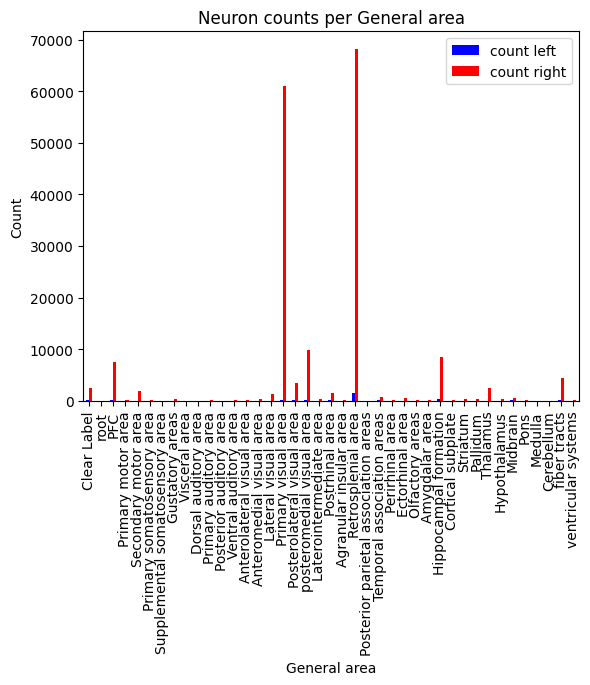

In [15]:
# plot combined_regions as a bar plot with the General area on the x-axis and the count on the y-axis, make count left blue and count right red
plt.figure(figsize=(12, 6)) 
combined_regions.plot(kind='bar', stacked=False, color=['blue', 'red'])
plt.xlabel("General area")
plt.ylabel("Count")
plt.title("Neuron counts per General area")
plt.show()


<Figure size 1200x600 with 0 Axes>

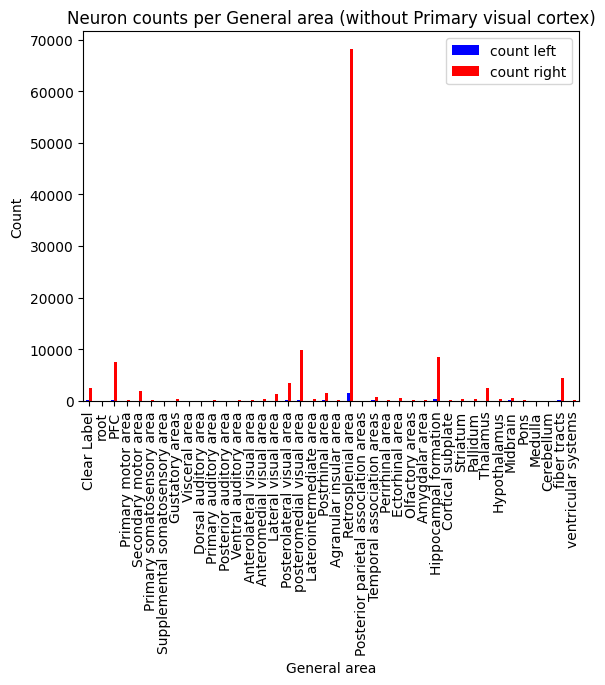

In [17]:
# plot the same plot but with Primary visual cortex excluded
combined_regions_no_V1 = combined_regions.drop("Primary visual area")
plt.figure(figsize=(12, 6))
combined_regions_no_V1.plot(kind='bar', stacked=False, color=['blue', 'red'])
plt.xlabel("General area")
plt.ylabel("Count")
plt.title("Neuron counts per General area (without Primary visual cortex)")
plt.show()